# Notebook 2: Exploratory analysis of the dataset (EDA)

Nicolas cuaran sotelo

Juan Pablo Gomez

Juan Jose Orozco 

This notebook focuses on performing Exploratory Data Analysis (EDA) on the Developer Survey Dataset. EDA is a crucial step in the data analysis process as it helps us understand the structure and characteristics of the dataset. By analyzing this dataset, we can uncover patterns, relationships, and potential insights that can guide further analysis and decision-making.
In this notebook, we will explore the dataset using various statistical and visualization techniques. We will examine:

The distribution of developers by country.

The relationship between education level and employment status.

The most common programming roles (DevType).

The distribution of company sizes and their workforce composition.

Insights on salary trends (if available in the dataset).

Other relevant trends from the survey.

Through this analysis, we aim to gain a comprehensive understanding of the dataset and extract meaningful insights about the global developer community.

Librerias

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from dotenv import load_dotenv


Credenciales

In [2]:
load_dotenv("../.env")

user = os.getenv("PG_USER")
password = os.getenv("PG_PASSWORD")
host = os.getenv("PG_HOST")
port = os.getenv("PG_PORT")
database = os.getenv("PG_DATABASE")

Conexion a base de datos 

In [3]:
url = f"postgresql://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(url)

Extraccion de los datos 

In [4]:
query = "SELECT * FROM surevey_results;"

df = pd.read_sql(query, engine)

df.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,None,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,None,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,None,None,None,None,None,None,None,None,None,None
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,26,No,No,United States,"Yes, full-time",Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","1,000 to 4,999 employees",Student,...,3 - 4 times per week,None,None,None,None,None,None,None,None,None


Empezamos con la revision de los datos verificando que tipos de datos tenemos

In [5]:
df.dtypes

Respondent        int64
Hobby            object
OpenSource       object
Country          object
Student          object
                  ...  
Age              object
Dependents       object
MilitaryUS       object
SurveyTooLong    object
SurveyEasy       object
Length: 129, dtype: object

Vemos que tenemos muchos object alparecer veamos cuantos tenemos en total con df.info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Columns: 129 entries, Respondent to SurveyEasy
dtypes: float64(41), int64(1), object(87)
memory usage: 97.3+ MB


al parecer hay datos con tipo de dato incorrecto ya que despues de revisar el archivo survey_results_schema.csv que nos dice el esquema para la encuesta podemos inferir un tipo de dato esperado y no concuerdan con las que presenta el dataset por lo mismo decidi leer cada una de las columnas del esquema y ver que valor era el esperado e hice una lista con todos y ahora voy a cambiar los tipo de datos

In [7]:

dtype_dict = {
    'Respondent': 'int64',
    'Hobby': 'category',
    'OpenSource': 'category',
    'Country': 'category',
    'Student': 'category',
    'Employment': 'category',
    'FormalEducation': 'category',
    'UndergradMajor': 'category',
    'CompanySize': 'category',
    'DevType': 'string',
    'YearsCoding': 'category',
    'YearsCodingProf': 'category',
    'JobSatisfaction': 'category',
    'CareerSatisfaction': 'category',
    'HopeFiveYears': 'category',
    'JobSearchStatus': 'category',
    'LastNewJob': 'category',
    'AssessJob1': 'int64',
    'AssessJob2': 'int64',
    'AssessJob3': 'int64',
    'AssessJob4': 'int64',
    'AssessJob5': 'int64',
    'AssessJob6': 'int64',
    'AssessJob7': 'int64',
    'AssessJob8': 'int64',
    'AssessJob9': 'int64',
    'AssessJob10': 'int64',
    'AssessBenefits1': 'int64',
    'AssessBenefits2': 'int64',
    'AssessBenefits3': 'int64',
    'AssessBenefits4': 'int64',
    'AssessBenefits5': 'int64',
    'AssessBenefits6': 'int64',
    'AssessBenefits7': 'int64',
    'AssessBenefits8': 'int64',
    'AssessBenefits9': 'int64',
    'AssessBenefits10': 'int64',
    'AssessBenefits11': 'int64',
    'JobContactPriorities1': 'int64',
    'JobContactPriorities2': 'int64',
    'JobContactPriorities3': 'int64',
    'JobContactPriorities4': 'int64',
    'JobContactPriorities5': 'int64',
    'JobEmailPriorities1': 'int64',
    'JobEmailPriorities2': 'int64',
    'JobEmailPriorities3': 'int64',
    'JobEmailPriorities4': 'int64',
    'JobEmailPriorities5': 'int64',
    'JobEmailPriorities6': 'int64',
    'JobEmailPriorities7': 'int64',
    'UpdateCV': 'category',
    'Currency': 'category',
    'Salary': 'float64',
    'SalaryType': 'category',
    'ConvertedSalary': 'float64',
    'CurrencySymbol': 'category',
    'CommunicationTools': 'string',
    'TimeFullyProductive': 'category',
    'EducationTypes': 'category',
    'SelfTaughtTypes': 'string',
    'TimeAfterBootcamp': 'category',
    'HackathonReasons': 'string',
    'AgreeDisagree1': 'category',
    'AgreeDisagree2': 'category',
    'AgreeDisagree3': 'category',
    'LanguageWorkedWith': 'string',
    'LanguageDesireNextYear': 'string',
    'DatabaseWorkedWith': 'string',
    'DatabaseDesireNextYear': 'string',
    'PlatformWorkedWith': 'string',
    'PlatformDesireNextYear': 'string',
    'FrameworkWorkedWith': 'string',
    'FrameworkDesireNextYear': 'string',
    'IDE': 'string',
    'OperatingSystem': 'category',
    'NumberMonitors': 'int64',
    'Methodology': 'string',
    'VersionControl': 'string',
    'CheckInCode': 'category',
    'AdBlocker': 'category',
    'AdBlockerDisable': 'category',
    'AdBlockerReasons': 'string',
    'AdsAgreeDisagree1': 'category',
    'AdsAgreeDisagree2': 'category',
    'AdsAgreeDisagree3': 'category',
    'AdsActions': 'string',
    'AdsPriorities1': 'int64',
    'AdsPriorities2': 'int64',
    'AdsPriorities3': 'int64',
    'AdsPriorities4': 'int64',
    'AdsPriorities5': 'int64',
    'AdsPriorities6': 'int64',
    'AdsPriorities7': 'int64',
    'AIDangerous': 'category',
    'AIInteresting': 'category',
    'AIResponsible': 'category',
    'AIFuture': 'category',
    'EthicsChoice': 'category',
    'EthicsReport': 'category',
    'EthicsResponsible': 'category',
    'EthicalImplications': 'category',
    'StackOverflowRecommend': 'int64',
    'StackOverflowVisit': 'category',
    'StackOverflowHasAccount': 'category',
    'StackOverflowParticipate': 'category',
    'StackOverflowJobs': 'category',
    'StackOverflowDevStory': 'category',
    'StackOverflowJobsRecommend': 'int64',
    'StackOverflowConsiderMember': 'category',
    'HypotheticalTools1': 'int64',
    'HypotheticalTools2': 'int64',
    'HypotheticalTools3': 'int64',
    'HypotheticalTools4': 'int64',
    'HypotheticalTools5': 'int64',
    'WakeTime': 'category',
    'HoursComputer': 'category',
    'HoursOutside': 'category',
    'SkipMeals': 'int64',
    'ErgonomicDevices': 'string',
    'Exercise': 'category',
    'Gender': 'string',
    'SexualOrientation': 'string',
    'EducationParents': 'category',
    'RaceEthnicity': 'string',
    'Age': 'int64',
    'Dependents': 'category',
    'MilitaryUS': 'category',
    'SurveyTooLong': 'category',
    'SurveyEasy': 'category'
}

def apply_dtypes(df, dtype_dict):
    for column, dtype in dtype_dict.items():
        try:
            if dtype == 'category':
                df[column] = df[column].astype('category')
            elif dtype == 'string':
                df[column] = df[column].astype('string')
            elif dtype == 'int64':
                df[column] = pd.to_numeric(df[column], errors='coerce').astype('Int64')
            elif dtype == 'float64':
                df[column] = pd.to_numeric(df[column], errors='coerce').astype('float64')
            else:
                print(f"Tipo {dtype} no manejado para la columna {column}")
        except Exception as e:
            print(f"Error al convertir la columna {column} a {dtype}: {e}")
    return df

df = apply_dtypes(df,dtype_dict)

## 1.inspeccion inicial del dataset


In [6]:
print("Primeras 5 filas del DataFrame:")
print(df.head())

Primeras 5 filas del DataFrame:
   Respondent Hobby OpenSource         Country         Student  \
0           1   Yes         No           Kenya              No   
1           3   Yes        Yes  United Kingdom              No   
2           4   Yes        Yes   United States              No   
3           5    No         No   United States              No   
4          26    No         No   United States  Yes, full-time   

           Employment                           FormalEducation  \
0  Employed part-time  Bachelor’s degree (BA, BS, B.Eng., etc.)   
1  Employed full-time  Bachelor’s degree (BA, BS, B.Eng., etc.)   
2  Employed full-time                          Associate degree   
3  Employed full-time  Bachelor’s degree (BA, BS, B.Eng., etc.)   
4  Employed part-time  Bachelor’s degree (BA, BS, B.Eng., etc.)   

                                      UndergradMajor  \
0                          Mathematics or statistics   
1  A natural science (ex. biology, chemistry, phy...   


dimensiones

In [13]:
print("\nDimensiones del DataFrame (filas, columnas):", df.shape)


Dimensiones del DataFrame (filas, columnas): (98855, 129)


informacion general de dataframe

In [14]:

print("\nInformación general del DataFrame:")
print(df.info())


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Columns: 129 entries, Respondent to SurveyEasy
dtypes: Int64(51), category(55), float64(2), string(21)
memory usage: 66.0 MB
None


## 3. visualizacion y graficas de los datos 




contar valores nulos por columna


In [8]:
missing = df.isnull().sum()
print("\nConteo de valores nulos por columna:")
print(missing[missing > 0])


Conteo de valores nulos por columna:
Country              412
Student             3954
Employment          3534
FormalEducation     4152
UndergradMajor     19819
                   ...  
Age                34281
Dependents         36259
MilitaryUS         83074
SurveyTooLong      32914
SurveyEasy         32976
Length: 126, dtype: int64


## grafica para columnas con mas valores nulos



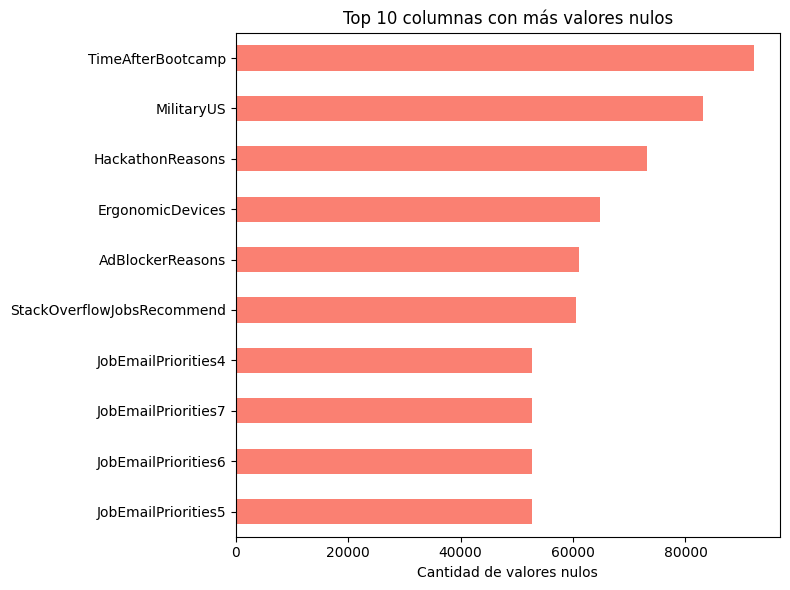

In [10]:
missing_filtered = missing[missing > 0].sort_values(ascending=False).head(10)

if not missing_filtered.empty:
    plt.figure(figsize=(8, 6))
    missing_filtered.plot(kind='barh', color='salmon')
    plt.xlabel('Cantidad de valores nulos')
    plt.title('Top 10 columnas con más valores nulos')
    plt.gca().invert_yaxis()  # Para que la más incompleta aparezca arriba
    plt.tight_layout()
    plt.show()

# 4. Análisis y visualización de columnas importantes

grafica de la columna gender



Tabla de frecuencias - Gender:
Gender
Male                                                                         59458
Female                                                                        4025
Non-binary, genderqueer, or gender non-conforming                              284
Female;Transgender                                                             145
Male;Non-binary, genderqueer, or gender non-conforming                         128
Transgender                                                                    105
Female;Male                                                                     98
Transgender;Non-binary, genderqueer, or gender non-conforming                   51
Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming       50
Female;Non-binary, genderqueer, or gender non-conforming                        50
Male;Transgender                                                                29
Female;Transgender;Non-binary, genderqueer, or g

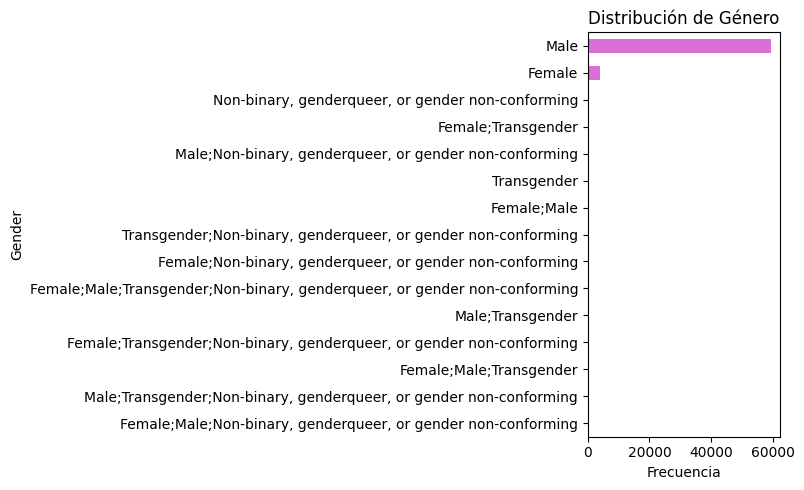

In [33]:
if 'Gender' in df.columns:
    gender_counts = df['Gender'].value_counts()
    print("\nTabla de frecuencias - Gender:")
    print(gender_counts)
    
    plt.figure(figsize=(8,5))
    gender_counts.sort_values().plot(kind='barh', color='orchid')
    plt.xlabel('Frecuencia')
    plt.title('Distribución de Género')
    plt.tight_layout()
    plt.show()


grafica de la columna Devtype


Tabla de frecuencias - DevType:
DevType
Back-end developer                               53300
Full-stack developer                             44353
Front-end developer                              34822
Mobile developer                                 18804
Desktop or enterprise applications developer     15807
Student                                          15732
Database administrator                           13216
Designer                                         12019
System administrator                             10375
DevOps specialist                                 9549
Data or business analyst                          7559
Data scientist or machine learning specialist     7088
QA or test developer                              6194
Engineering manager                               5256
Embedded applications or devices developer        4819
Game or graphics developer                        4642
Product manager                                   4316
Educator or academic res

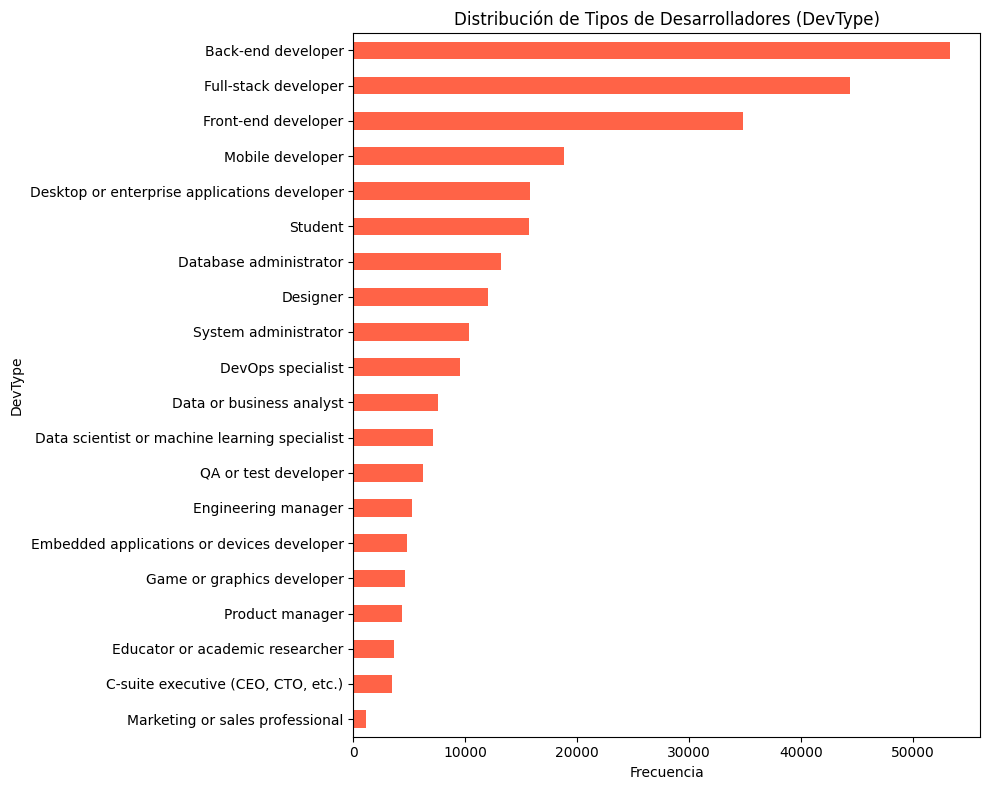

In [31]:
if 'DevType' in df.columns:
    devtype_exploded = df['DevType'].dropna().str.split(';').explode().str.strip()
    devtype_counts = devtype_exploded.value_counts()
    print("\nTabla de frecuencias - DevType:")
    print(devtype_counts)
    
    plt.figure(figsize=(10,8))
    devtype_counts.sort_values().plot(kind='barh', color='tomato')
    plt.xlabel('Frecuencia')
    plt.title('Distribución de Tipos de Desarrolladores (DevType)')
    plt.tight_layout()
    plt.show()



grafica de la situacion laboral (employment)


Tabla de frecuencias - Employment:
Employment
Employed full-time                                      70495
Independent contractor, freelancer, or self-employed     9282
Not employed, but looking for work                       5805
Employed part-time                                       5380
Not employed, and not looking for work                   4132
Retired                                                   227
Name: count, dtype: int64


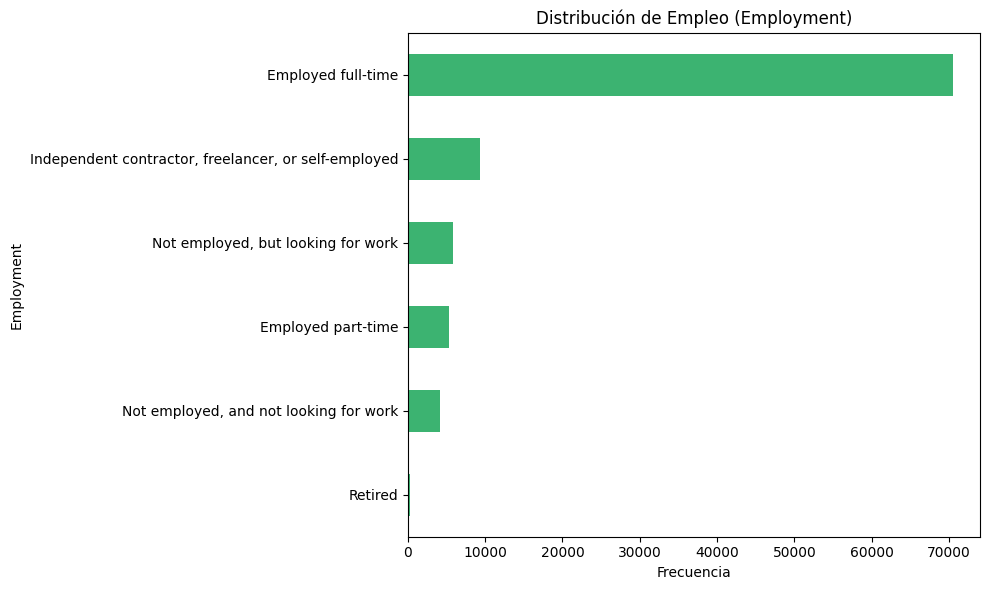

In [32]:


# --- Employment (Situación laboral)
if 'Employment' in df.columns:
    emp_counts = df['Employment'].value_counts()
    print("\nTabla de frecuencias - Employment:")
    print(emp_counts)
    
    plt.figure(figsize=(10,6))
    emp_counts.sort_values().plot(kind='barh', color='mediumseagreen')
    plt.xlabel('Frecuencia')
    plt.title('Distribución de Empleo (Employment)')
    plt.tight_layout()
    plt.show()
